In [34]:
import pandas as pd
import numpy as np

In [35]:
import optuna

### Defining a simple objective function

In [36]:
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return (x - 2) ** 2


In [37]:
#define th epruner and sampler
study_pruner = optuna.pruners.MedianPruner()
study_sampler = optuna.samplers.RandomSampler()

In [38]:
study = optuna.create_study(study_name="basic_objective_function", sampler=study_sampler, pruner=study_pruner, direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-01-12 19:58:16,801] A new study created in memory with name: basic_objective_function
[I 2024-01-12 19:58:16,804] Trial 0 finished with value: 2.93690014796091 and parameters: {'x': 3.7137386463404827}. Best is trial 0 with value: 2.93690014796091.
[I 2024-01-12 19:58:16,806] Trial 1 finished with value: 103.95689198940026 and parameters: {'x': -8.195925264016026}. Best is trial 1 with value: 103.95689198940026.
[I 2024-01-12 19:58:16,807] Trial 2 finished with value: 85.19490772678625 and parameters: {'x': -7.23010876029022}. Best is trial 1 with value: 103.95689198940026.
[I 2024-01-12 19:58:16,808] Trial 3 finished with value: 81.27047502694677 and parameters: {'x': -7.015013867263143}. Best is trial 1 with value: 103.95689198940026.
[I 2024-01-12 19:58:16,809] Trial 4 finished with value: 13.937378323996345 and parameters: {'x': 5.733279834675717}. Best is trial 1 with value: 103.95689198940026.
[I 2024-01-12 19:58:16,810] Trial 5 finished with value: 22.384606464767348 and

In [39]:
#get the best aprams
study.best_params  # E.g. {'x': 2.002108042}

{'x': -9.997264080993345}

In [40]:
#get the best trial
study.best_trial

FrozenTrial(number=63, state=TrialState.COMPLETE, values=[143.9343454290931], datetime_start=datetime.datetime(2024, 1, 12, 19, 58, 16, 862748), datetime_complete=datetime.datetime(2024, 1, 12, 19, 58, 16, 862890), params={'x': -9.997264080993345}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'x': FloatDistribution(high=10.0, log=False, low=-10.0, step=None)}, trial_id=63, value=None)

In [41]:
#get the best value of 'x' in the object function
study.best_value

143.9343454290931

In [42]:
#get the study name
study.study_name

'basic_objective_function'

In [43]:
#get the complete dataframe of the trials
study.trials_dataframe(attrs=("number", "value", "params", "state"))

,number,value,params_x,state
0,0,2.936900,3.713739,COMPLETE
1,1,103.956892,-8.195925,COMPLETE
2,2,85.194908,-7.230109,COMPLETE
3,3,81.270475,-7.015014,COMPLETE
4,4,13.937378,5.733280,COMPLETE
...,...,...,...,...
95,95,9.305393,-1.050474,COMPLETE
96,96,0.135876,1.631386,COMPLETE
97,97,87.281523,-7.342458,COMPLETE
98,98,36.952202,8.078832,COMPLETE


### Visualising the results using the optuna dashboard

In [44]:
import optuna
from optuna_dashboard import run_server

In [19]:
def objective(trial):
    
    a = trial.suggest_float('a', 1, 10)
    b = trial.suggest_float('b', 1, 10)
    
    return a+b

storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(study_name="simple addition", direction='maximize', storage=storage)

study.optimize(objective, n_trials=100)

[I 2024-01-12 19:39:40,813] A new study created in memory with name: simple addition
[I 2024-01-12 19:39:40,818] Trial 0 finished with value: 12.839502453410002 and parameters: {'a': 2.8693424417706277, 'b': 9.970160011639376}. Best is trial 0 with value: 12.839502453410002.
[I 2024-01-12 19:39:40,819] Trial 1 finished with value: 7.340658132260577 and parameters: {'a': 4.053937986737872, 'b': 3.286720145522705}. Best is trial 0 with value: 12.839502453410002.
[I 2024-01-12 19:39:40,821] Trial 2 finished with value: 11.095933685558677 and parameters: {'a': 1.8276817058704196, 'b': 9.268251979688257}. Best is trial 0 with value: 12.839502453410002.
[I 2024-01-12 19:39:40,822] Trial 3 finished with value: 8.648205405059793 and parameters: {'a': 2.56259815851364, 'b': 6.085607246546153}. Best is trial 0 with value: 12.839502453410002.
[I 2024-01-12 19:39:40,823] Trial 4 finished with value: 17.014403595390462 and parameters: {'a': 8.350267570051189, 'b': 8.664136025339275}. Best is trial 

In [13]:
run_server(storage)

Bottle v0.12.25 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.



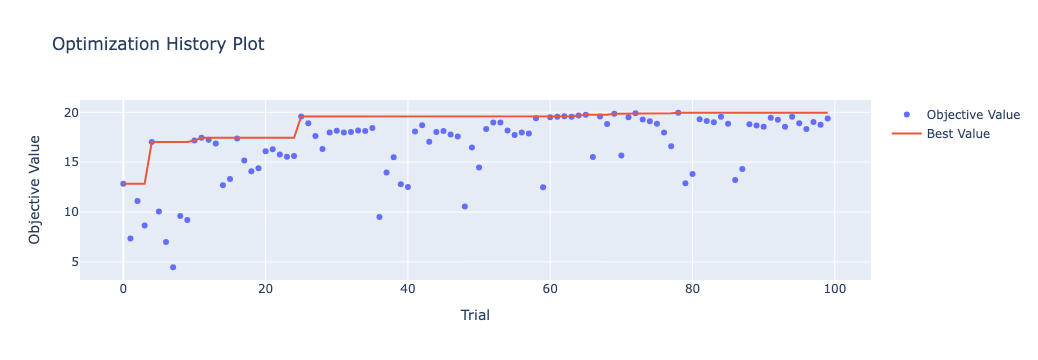

In [20]:
plot_optimization_history(study)

### Plotting the graphs in the notebookstudy = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=SEED),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10),
)
study.optimize(objective, n_trials=100, timeout=600)

In [45]:
import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna

# You can use Matplotlib instead of Plotly for visualization by simply replacing `optuna.visualization` with
# `optuna.visualization.matplotlib` in the following examples.
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_rank
from optuna.visualization.matplotlib import plot_slice
from optuna.visualization.matplotlib import plot_timeline

SEED = 42

np.random.seed(SEED)

In [46]:
def objective(trial):
    data, target = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [47]:
from optuna.visualization import plot_optimization_history

In [48]:
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=SEED),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10),
)
study.optimize(objective, n_trials=100, timeout=600)

[I 2024-01-12 19:58:31,895] A new study created in memory with name: no-name-00c3bbaf-6ea2-4da9-9825-434a02b1bde0
[I 2024-01-12 19:58:31,978] Trial 0 finished with value: 0.972027972027972 and parameters: {'bagging_fraction': 0.6247240713084175, 'bagging_freq': 7, 'min_child_samples': 75}. Best is trial 0 with value: 0.972027972027972.
[I 2024-01-12 19:58:32,314] Trial 1 finished with value: 0.972027972027972 and parameters: {'bagging_fraction': 0.759195090518222, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 0 with value: 0.972027972027972.
[I 2024-01-12 19:58:32,391] Trial 2 finished with value: 0.958041958041958 and parameters: {'bagging_fraction': 0.4348501673009197, 'bagging_freq': 7, 'min_child_samples': 62}. Best is trial 0 with value: 0.972027972027972.
[I 2024-01-12 19:58:32,479] Trial 3 finished with value: 0.9790209790209791 and parameters: {'bagging_fraction': 0.8248435466776274, 'bagging_freq': 1, 'min_child_samples': 98}. Best is trial 3 with value: 0.9790209

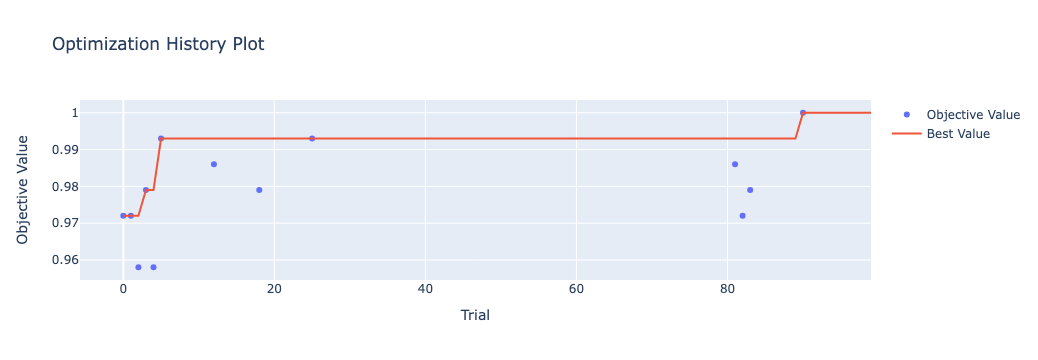

In [50]:
plot_optimization_history(study)

In [51]:
plot_param_importances(study)

/var/folders/2j/dc7nf71d5rs257btd835kclr0000gp/T/ipykernel_39005/3836449081.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



ImportError: Tried to import 'matplotlib' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'matplotlib'.

In [33]:
plot_parallel_coordinate(study)

/var/folders/2j/dc7nf71d5rs257btd835kclr0000gp/T/ipykernel_39005/4291280223.py:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



ImportError: Tried to import 'matplotlib' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'matplotlib'.